In [35]:
import sys
!{sys.executable} -m pip install --upgrade matplotlib
#!{sys.executable} -m pip install --upgrade pandas
#!{sys.executable} -m pip install --upgrade  sickit-learn 
#!{sys.executable} -m pip install featurewiz

Defaulting to user installation because normal site-packages is not writeable


In [36]:
# -*- coding: utf-8 -*-
"""
Created on Sat Apr  3 09:14:44 2021

@author: pmarc
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity


In [37]:

donnee = pd.read_csv('../Fichiers/DonneesFumeursv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)



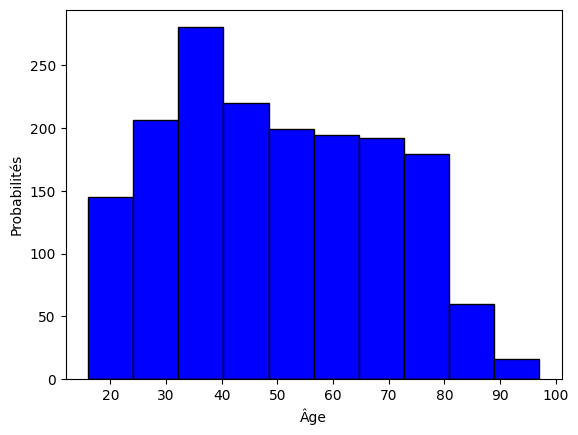

In [38]:

##"Génération des histogrammes et fonction de densité"

ax=donnee["Âge"].plot.hist(density=False, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Âge")

ax=donnee["Âge"].plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Âge")
ax.set_ylabel("Probabilités")



## d = num de segmentos da linha
d=100
grille_x = np.linspace(donnee["Âge"].min()-10, donnee["Âge"].max()+10, d)
dx=(donnee["Âge"].max()+10-(donnee["Âge"].min()-10))/(d-1)
Age_valeurs=donnee["Âge"].values.reshape(-1, 1)




0.9959804753942066


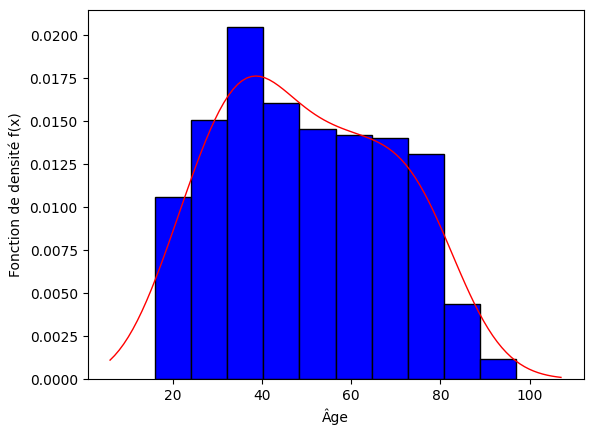

In [34]:


### bandwith = precisão da linha (2o gŕafico). Qto menor, mais cortada a linha
kde = KernelDensity(kernel='gaussian', bandwidth=8).fit(Age_valeurs)
TEST=kde.score_samples(grille_x.reshape(-1, 1))
pdf = np.exp(kde.score_samples(grille_x.reshape(-1, 1)))

fig, ax = plt.subplots()
ax=donnee["Âge"].plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Âge")
ax.plot(grille_x, pdf, linewidth=1, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")

print((pdf*dx).sum())



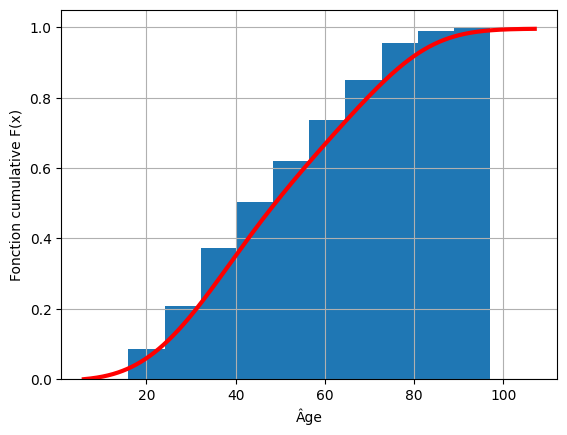

In [21]:

#grille2_x = np.linspace(donnee["Âge"].min(), donnee["Âge"].max(), d)
#pdf2 = np.exp(kde.score_samples(grille2_x.reshape(-1, 1)))
#pdf2=pdf2/((pdf2*dx).sum())

#print((pdf2*dx).sum())

#fig, ax = plt.subplots()
#ax=donnee["Âge"].plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
#ax.set_xlabel("Âge")
#ax.plot(grille2_x, pdf2, linewidth=3, color = 'red')
#ax.set_ylabel("Fonction de densité f(x)")

fig, ax = plt.subplots()
### exemplo cumulativo
donnee["Âge"].hist(cumulative=True, density=1, bins=10)
cdf = np.cumsum(pdf*dx)
ax.plot(grille_x, cdf, linewidth=3, color = 'red')
ax.set_xlabel("Âge")
ax.set_ylabel("Fonction cumulative F(x)")



grille_x_pd=pd.DataFrame(grille_x)
grille_x_pd.columns=["Âges"]
pdf_pd=pd.DataFrame(pdf)
### probability distribution
pdf_pd.columns=["PDF"]

cdf_pd=pd.DataFrame(cdf)
### cumulative distribution
cdf_pd.columns=["CDF"]  
DistAge=pd.concat([grille_x_pd,pdf_pd,cdf_pd],axis=1)

Prob_moins_40=DistAge["PDF"][DistAge["Âges"]<=40].sum()*dx
    

